##  Introduction to scikit learn

this notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn Library

what we're going to cover:


    0.An end-to-end Scikit-Learn workflow
    1.getting the data ready
    2.choose the right estimator/algorithm for our problems
    3.Fit the model/algorithm and use it to make predictions on our data
    4.Evaluating a model
    5.Improve a model
    6.save and load a trained model
    7.putting it all together 

## 0.An end-to-end Scikit-Learn workflow

In [1]:
import numpy as np

In [2]:
# 1 .Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix )
x = heart_disease.drop("target" , axis = 1)

# Create y labels 
y = heart_disease["target"]

In [4]:
# 2 . Choose the right model and hyperparameters 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters 
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [5]:
# 3 . Fit the model to the training data 
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y, test_size= 0.2)

In [6]:
clf.fit(x_train, y_train);

In [7]:
# # Make a prediction 
# y_label = clf.predict(np.array([0, 2, 3, 4]))

In [8]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2


In [9]:
y_preds = clf.predict(x_test)
y_preds 

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [10]:
y_test

29     1
0      1
229    0
111    1
296    0
      ..
244    0
200    0
76     1
126    1
155    1
Name: target, Length: 61, dtype: int64

In [11]:
# 4 . Evaluate the model 
clf.score(x_train, y_train)

1.0

In [12]:
clf.score(x_test, y_test)

0.819672131147541

In [13]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[21,  7],
       [ 4, 29]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [16]:
# 5 . Improve a model 
# try different amount of n_estimators 

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set : {clf.score(x_test, y_test)* 100:.2f}")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set : 88.52
 
Trying model with 20 estimators...
Model accuracy on test set : 77.05
 
Trying model with 30 estimators...
Model accuracy on test set : 81.97
 
Trying model with 40 estimators...
Model accuracy on test set : 81.97
 
Trying model with 50 estimators...
Model accuracy on test set : 80.33
 
Trying model with 60 estimators...
Model accuracy on test set : 80.33
 
Trying model with 70 estimators...
Model accuracy on test set : 78.69
 
Trying model with 80 estimators...
Model accuracy on test set : 78.69
 
Trying model with 90 estimators...
Model accuracy on test set : 80.33
 


In [17]:
# 6. Save a model and load it 
import pickle

pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("random_forst_model_1.pkl","rb"))
loaded_model.score(x_test, y_test)*100

80.32786885245902

In [19]:
 !pip install jupyterthemes 

## List all available themes 

In [20]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [21]:
!jt -t onedork

In [22]:
from jupyterthemes import get_themes 
from jupyterthemes.stylefx import set_nb_theme

In [23]:
set_nb_theme('solarizedd')

In [24]:
# Standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data to be used with machine learning

Three main things we have to do:
        
        1. Split the data into features and labels (usually x and y)
        2. filling (also called computing) or disregarding missing values
        3. converting non-numericals values to numericals values (also called feature encoding )

In [25]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
# Split the data into training and test sets 
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [28]:
x_train.shape, x_test.shape , y_train.shape , y_test.shape 

((242, 13), (61, 13), (242,), (61,))

In [29]:
x.shape[0] * 0.8

242.4

## Tip

## Clean Data -> Transform Data -> Reduce data

### 1.1 Make sure it's all numerical

In [30]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [31]:
len(car_sales)

1000

In [32]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [33]:
# Split into X and Y 

x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# Split into training and test 
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2)

In [34]:
# Build machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

## Turn the Categories into Numbers 



In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [36]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [37]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies 

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [39]:
# Let's refit the model

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2 )

model.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
model.score(x_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values ??

1. Fill them with some value (also known as imputation )
2. Remove the samples with missing data altogether.


In [41]:
# Import car sales missing data 
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [42]:
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [43]:
# Create X and y 
from sklearn.model_selection import train_test_split

# Split into X and Y 
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [44]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [45]:
# # Let's try and convert it to numbers 
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = ["Make", "Colour", "Doors"]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot",
#                                  one_hot,
#                                  categorical_features)],
#                                remainder = "passthrough")

# transformed_x = transformer.fit_transform(x)
# transformed_x

### option 1 : Fill missing data with Pandas 

In [46]:
# # Fill the "Make" column
# car_sales_missing["Make"].fillna("missing", inplace = True)

# # Fill the 'Colour' column 
# car_sales_missing["Colour"].fillna("missing", inplace = True)

# # Fill the Odometer (Km) cloumn 
# car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace = True)

# # Fill the 'Doors' column 
# car_sales_missing["Doors"].fillna(4, inplace = True)

In [47]:
# # Check out dataframe again 
# car_sales_missing.isna().sum()

In [48]:
# Remove rows with missing Price values
car_sales_missing.dropna(inplace = True)

In [49]:
 car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [50]:
# x = car_sales_missing.drop("Price", axis = 1)
# y = car_sales_missing["Price"]

In [51]:
from sklearn.model_selection import train_test_split

# Split into X and y 
x = car_sales_missing.drop("Price" , axis = 1)
y = car_sales_missing["Price"]

# Split data into train and test 

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [52]:
 x.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

### Option 2 : Fill missing values with Scikit-Learn 


In [53]:
# # Now we've transformed X, let's see if we can fit a model 
# np.random.seed(42)
# from sklearn.ensemble import RandomForestRegressor

# # setup model 
# model = RandomForestRegressor()

# # Make sure to use transformed (filled and one-hot encoded X data) 
# model.fit(transformed_x, y_train)
# model.score(transformed_x, y_test)

In [54]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [57]:
# Fill missing values with Scickit-Learn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant" , fill_value = "missing")
door_imputer = SimpleImputer(strategy= "constant" , fill_value= 4)
num_imputer = SimpleImputer(strategy= 'mean')

# Define columns 
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer,cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer" , num_imputer , num_features)
])

filled_x_train = imputer.fit_transform(x_train)  # Fill train and test valeus separately # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_x_test = imputer.transform(x_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled x_train 
filled_x_train

array([['Toyota', 'Green', 4.0, 221725.0],
       ['Honda', 'White', 4.0, 113704.0],
       ['Toyota', 'Blue', 4.0, 140465.0],
       ...,
       ['BMW', 'White', 5.0, 176864.0],
       ['Honda', 'Black', 4.0, 123924.0],
       ['Toyota', 'White', 4.0, 22788.0]], dtype=object)

In [58]:
# Get our transformed data arrays's back into Dataframes's 

car_sales_filled_train = pd.DataFrame(filled_x_train, 
                                     columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_x_test,
                                    columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
car_sales_filled_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Green,4.0,221725.0
1,Honda,White,4.0,113704.0
2,Toyota,Blue,4.0,140465.0
3,Toyota,Blue,4.0,223875.0
4,Honda,Red,4.0,111727.0


In [60]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [61]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [62]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

# Fill train and test values separately
transformed_x_train = transformer.fit_transform(car_sales_filled_train) # Fit and transform the training data
transformed_x_test = transformer.fit_transform(car_sales_filled_test) # transform the test data 

# Check transformed and filled x_train 
transformed_x_train.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

## Fit a model 

In [63]:
# Now we've transformed x , let's see if we can fit a model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup  model 
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_x_train, y_train)
model.score(transformed_x_test, y_test)

0.3565598201444543

In [64]:
y.isna().sum()

0

## 2. Choose the right estimator/ algorithm for your problem 

some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
* Sometimes you'll see clf (short for classifier) used as a classification      estimator
*  Regression problem- predicting a number (selling price of a car)

    If u re working on a ml problem and looking to use Sklearn and not sure what model u should use ,refer to the sklearn machine learning map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.htm

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [65]:
# Get California housing dataset 
from sklearn.datasets import fetch_california_housing 

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [66]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [67]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [68]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [69]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [70]:
# Import algorithm 
from sklearn.linear_model import Ridge 

# Setup random seed 
np.random.seed(42)

# Create the data 
x = housing_df.drop("target", axis = 1)
y = housing_df["target"]   # median house price in  $100,000s

# Split into train and test sets 
x_train , x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2)

# Create random forest model 
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the model 
model.score(x_test, y_test)

0.8065734772187598

In [71]:
# Import algorithm 
from sklearn.linear_model import Ridge 

# Setup random seed 
np.random.seed(42)

# Create the data 
x = housing_df.drop("target", axis = 1)
y = housing_df["target"]   # median house price in  $100,000s

# Split into train and test sets 
x_train , x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2)

# Create random forest model 
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model 
model.score(x_test, y_test)

0.5758549611440126

What is `Ridge` didn't work or the score didn't fit our needs ?

Well , we could always try a different model ... 

How about we try an ensemble model (an ensemble is combination of smaller model to try and make better model than a single model )

Sklearn model ::: https://scikit-learn.org/0.16/modules/ensemble.html

In [72]:
# Import algorithm 
from sklearn.ensemble import RandomForestRegressor  

# Setup random seed 
np.random.seed(42)

# Create the data 
x = housing_df.drop("target", axis = 1)
y = housing_df["target"]   # median house price in  $100,000s

# Split into train and test sets 
x_train , x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2)

# Create random forest model 
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the model 
model.score(x_test, y_test)

0.8065734772187598

## 2.2 Choosing an estimator for a classification problem 

In [73]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
# Import the LinearSVC estimator class 
from sklearn.svm import LinearSVC

# Setup random seed 
np.random.seed(42)

# Make the data 
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2 )

# Instanstiate the LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [75]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [76]:
# Import the Randomforestclassifier estimator class 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# Make the data 
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2 )

# Instanstiate the RandomForestclassifier 
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

0.8524590163934426

## 3. Fit the model/ algorithm on our data and use it to make Prediction 

### 3.1 Fitting the model to the data

In [77]:
# Import the Randomforestclassifier estimator class 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# Make the data 
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2 )

# Instanstiate the RandomForestclassifier 
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

0.8524590163934426

In [78]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [79]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 Make predictions using a machine learning model

2 ways to make predictions:
    
    1. `predict()`
    2. `predict_proba()`

In [80]:
# Use a trained model to make predictions 

clf.predict(np.array([1,7,8,3,4]))  # this doesn't work

C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [81]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [82]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [83]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [84]:
clf.score(x_test, y_test)

0.8524590163934426

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with predict_proba()



In [86]:
# Predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [87]:
# Let's predict() on the same data ....
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [88]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [89]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### `predict()` can also be used for regression labels 

In [90]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [91]:
from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)

# Create the data 
x = housing_df.drop("target", axis = 1 )
y = housing_df["target"]

# Split into training and test sets 
x_train, x_test ,y_train, y_test = train_test_split(x,y, test_size= 0.2)

# Create model instance 
model = RandomForestRegressor()
model.fit(x_train, y_train)

# make predictions 
y_preds = model.predict(x_test)

In [92]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [93]:
np.array([y_test[:10]])

array([[0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]])

In [94]:
len(y_preds)

4128

In [95]:
len(y_test)

4128

In [96]:
# Compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [97]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model 


Three ways to evaluate Scikit-Learn model/estimators:

1. Estimator's built-in `score()` method 
2. The `scoring` parameter 
3. Problem-specific metric functions 
    
you can read this here : https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `Score` Method 

In [98]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop(["target"], axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2 )

model = RandomForestClassifier()
model.fit(x_train, y_train)



RandomForestClassifier()

In [99]:
model.score(x_train, y_train)

1.0

In [100]:
model.score(x_test, y_test)

0.8524590163934426

In [101]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [102]:
from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)

# Create the data 
x = housing_df.drop("target", axis = 1 )
y = housing_df["target"]

# Split into training and test sets 
x_train, x_test ,y_train, y_test = train_test_split(x,y, test_size= 0.2)

# Create model instance 
model = RandomForestRegressor()
model.fit(x_train, y_train)


RandomForestRegressor()

In [104]:
model.score(x_test,y_test)

0.8065734772187598

### 4.2 Evaluating a model using the `scoring` parameter

In [105]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier 

x = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train)



RandomForestClassifier()

In [106]:
clf.score(x_test, y_test)

0.7868852459016393

In [107]:
cross_val_score(clf, x, y)

array([0.81967213, 0.8852459 , 0.78688525, 0.8       , 0.75      ])

In [108]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y))

# Compare the two 
clf_single_score , clf_cross_val_score

(0.7868852459016393, 0.8248087431693989)

In [109]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [110]:
# Scoring parameter set to None by default
cross_val_score(clf, x, y, cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics 

1. Accuracy 
2. Area Under ROC curve 
3. Confusion matrix 
4. Classification report 

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# x_train, x_test , y_train, y_test = train_test_split(x, y ,test_size=0.2)

clf = RandomForestClassifier()
cross_val_score(clf, x, y)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [112]:
np.mean(cross_val_score(clf, x, y))

0.8018032786885245

In [113]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score(clf, x, y)) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy : 81.17%


 ### Area under the receiver operating characteristic curve (AUC/ROC)
 
* Area under curve (AUC)
* ROC curve 

ROC curves are a comaparision of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1 
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [114]:
# create x_test... etc..

In [115]:
from sklearn.metrics import roc_curve

# Fit the classifier 
clf.fit(x_train, y_train)

# Make predictions with probabilities 
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.97, 0.03],
       [0.65, 0.35],
       [0.18, 0.82],
       [0.7 , 0.3 ],
       [0.1 , 0.9 ],
       [0.  , 1.  ],
       [0.62, 0.38],
       [0.68, 0.32],
       [0.3 , 0.7 ],
       [0.61, 0.39]])

In [116]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.03, 0.35, 0.82, 0.3 , 0.9 , 1.  , 0.38, 0.32, 0.7 , 0.39])

In [117]:
# Calculate fpr , tpr and thresholds 
fpr , tpr , threshold = roc_curve(y_test, y_probs_positive)

# Check the false positive rates 
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.08695652, 0.17391304, 0.17391304,
       0.2173913 , 0.2173913 , 0.2173913 , 0.2173913 , 0.26086957,
       0.26086957, 0.30434783, 0.30434783, 0.30434783, 0.30434783,
       0.30434783, 0.69565217, 0.86956522, 1.        ])

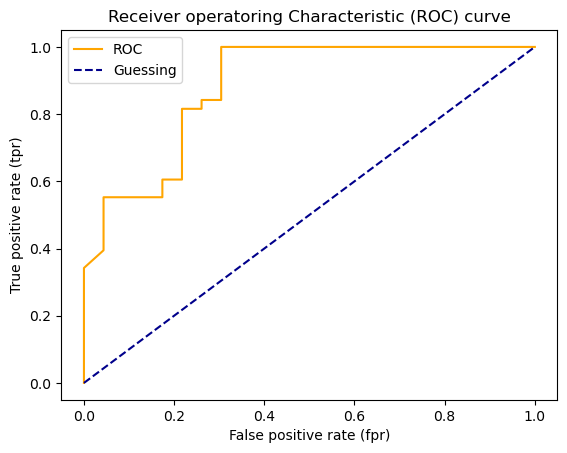

In [118]:
# Create a function for plotting ROC curve 
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plot of ROC curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve 
    plt.plot(fpr, tpr, color="orange", label = "ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customise the plot 
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver operatoring Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [119]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8821510297482837

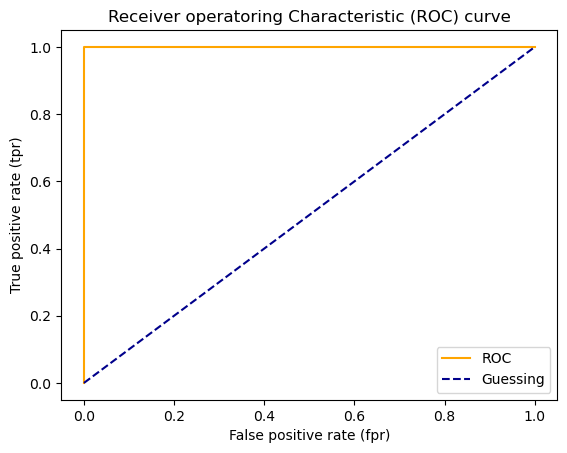

In [120]:
# Plot perfect ROC curve and AUC score
fpr , tpr , thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

### Confusion Matrix 

The next way to evaluate a classification model is by using a confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence ,this gives you an idea of where the model is getting confused 

In [121]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[17,  6],
       [ 7, 31]], dtype=int64)

In [122]:
pd.crosstab(y_test, y_preds,
           rownames = ["Actual Label"],
           colnames = ["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,17,6
1,7,31


### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating a confusion matrix with scikit learn version 1.0+

In [123]:
clf , model


(RandomForestClassifier(), RandomForestRegressor())

In [124]:
import sklearn 
sklearn.__version__

'1.3.0'

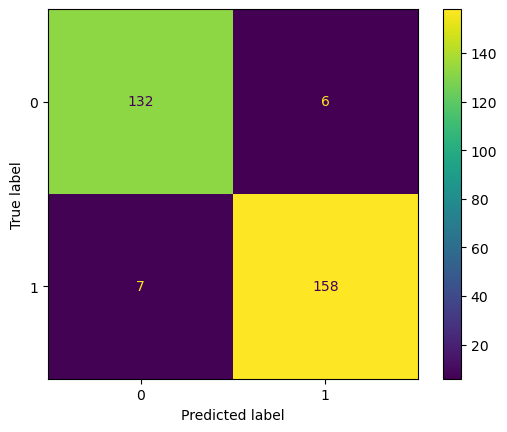

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)

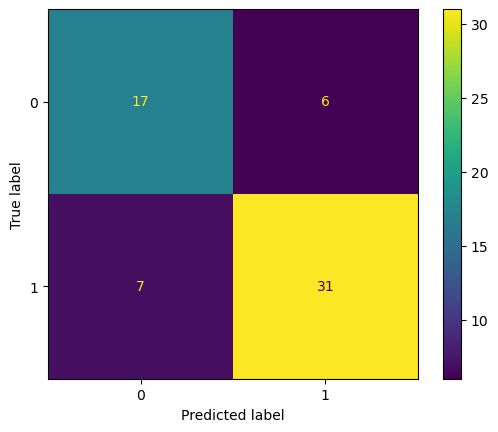

In [126]:
ConfusionMatrixDisplay.from_predictions(y_true= y_test,
                                       y_pred= y_preds);

### Classification report 

In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.84      0.82      0.83        38

    accuracy                           0.79        61
   macro avg       0.77      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [128]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1   # Only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Classification Report 

In [129]:
from sklearn.metrics  import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.84      0.82      0.83        38

    accuracy                           0.79        61
   macro avg       0.77      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



To summarize classification metrics:
    
*  `Accuaracy` is a good measure to start with if all classes are balanced (e.g same amount of sample which are labelled with 0 and 1).
* `Precision` and `Recall` become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision 
* If false negative prediction are worse than false positives , aim for higher recall.
* `F1-score` is a combination of precision and recall 

### 4.2.2 Regression model evaluation metrics 



The ones we're going to cover are:

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [130]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)


RandomForestRegressor()

In [131]:
model.score(x_test, y_test)

0.8065734772187598

In [132]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [133]:
y_test.mean()

2.0550030959302323

In [134]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean 
y_test_mean = np.full(len(y_test), y_test.mean())

In [135]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [136]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [137]:
y_test.head()

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: target, dtype: float64

### ** Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

it gives u an idea of how wrong your models predictions are. 

In [138]:
y_test


20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [139]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)

mae = mean_absolute_error(y_test, y_preds)

mae

0.32659871732073664

In [140]:
df = pd.DataFrame(data = {"actual values" : y_test,
                 "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [141]:
# MAE using formulas and differences 
np.abs(df["differences"]).mean()

0.32659871732073664

### *Mean squared error (MSE)*

MSE is the mean of the square of the errors between actual and predicted values 

In [142]:
# Mean squared error 
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)

mse = mean_squared_error(y_test, y_preds)
mse 

0.2534678520824551

In [143]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [144]:
# calculate MSE by hand 
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [145]:
df_large_error = df.copy()

In [146]:
# Claculate MSE with large error
df_large_error["squared_differences"].mean()

df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [147]:
df_large_error["squared_differences"].mean()

0.7295421709146245

### 4.2.3 Finally scoring using the `scoring` parameter 

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [149]:
np.random.seed(42)

## Cross-validation accuracy
cv_acc = cross_val_score(clf, x ,y, cv= 5, scoring=None) # if scoring = None , estimator's default scoring evaluation metric is used (accuracy for classification model)

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [150]:
# Cross-validated accuracy 
print(f"The cross-validated accuracy is : {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is : 82.48%


In [151]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x ,y, cv = 5 , scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [152]:
# Cross-validated accuracy 
print(f"The cross-validated accuracy is : {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is : 82.48%


In [153]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv= 5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [154]:
# Cross-validated Precision 
print(f"The cross-validated precision is : {np.mean(cv_precision)*100:.2f}%")

The cross-validated precision is : 83.30%


In [155]:
# Recall 
np.random.seed(42)
cv_recall = cross_val_score(clf,x,y, cv = 5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [156]:
# Cross-validated Recall
print(f"The cross-validated recall is : {np.mean(cv_recall)*100:.2f}%")

The cross-validated recall is : 85.45%


Let's see the `scoring` parameter being using for a regression problem....

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [158]:
np.random.seed(42)

cv_r2 = cross_val_score(model, x, y, cv= 3 , scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [159]:
# Mean absolute error 
cv_mae = cross_val_score(model, x, y, cv = 3 , scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.48474651661821716

In [160]:
# Mean squared error 
cv_mse = cross_val_score(model , x , y, cv = 3, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.4612318847966544

## 4.3 Using different evaluation metrics as Scikit-Learn functions 

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.`

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create X and Y
x = heart_disease.drop("target",axis =1)
y = heart_disease["target"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create model 
clf = RandomForestClassifier()

# Fit model 
clf.fit(x_train, y_train)

# Make predictions 
y_preds = clf.predict(x_test)

# Evaluate model using evalation functions 
print("Classifier metrics on the test set")
print(f"Accuracy : {accuracy_score(y_test, y_preds)* 100:.2f}%")
print(f"precision : {precision_score(y_test, y_preds)* 100:.2f}%")
print(f"Recall : {recall_score(y_test, y_preds)* 100:.2f}%")
print(f"f1 : {f1_score(y_test, y_preds)* 100:.2f}%")


Classifier metrics on the test set
Accuracy : 85.25%
precision : 84.85%
Recall : 87.50%
f1 : 86.15%


In [162]:
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and Y
x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create model 
model = RandomForestRegressor()

# Fit model 
model.fit(x_train, y_train)

# Make predictions 
y_preds = model.predict(x_test)

# Evaluate model using evalation functions 
print("regression metrics on the test set")
print(f"R2 score : {r2_score(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"MSE : {mean_squared_error(y_test, y_preds)}")

regression metrics on the test set
R2 score : 0.8065734772187598
MAE : 0.32659871732073664
MSE : 0.2534678520824551


## 5. Improving a model 

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:

* Is there a better model we could use ?
* Could we imrove our data ?

From a model perspective :

* Is there a better model we could use ?
* Could we improve the current model ?

Hyperparameters v/s Parameters 

parameters = model find these patterns in data 
Hyperparameters = settings on a model you can adjust to (potentially) its 
ability to find patterns 

Three ways to adjust hyperparameters:

1. By hand 
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [163]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [164]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters By hand

Let's make 3 sets, training , validation and test.

In [165]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split` 
* `n_estimators`

In [166]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels v/s y_preds labels
    on a classification 
    """
    
    accuaracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : round(accuaracy, 2),
                  "precision" : round(precision, 2),
                  "recall" : round(recall, 2),
                  "f1" : round(f1, 2)}
    
    print(f"Acc : {accuaracy * 100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 score : {f1:.2f}")
    
    return metric_dict 

In [167]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac = 1)

# Split into X and Y
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split the data into train , validation and test sets 
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid , y_valid = x[train_split:valid_split] , y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make prediction 
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc : 82.22%
Precision : 0.81
Recall : 0.88
F1 score : 0.85


In [168]:
np.random.seed(42)

# Create a second classifier with different hyperparameters 
clf_2 = RandomForestClassifier(n_estimators=100)

clf_2.fit(x_train, y_train)

# Make predictions with different hyperparameters 
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier 
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc : 82.22%
Precision : 0.84
Recall : 0.84
F1 score : 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [169]:
from  sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
       "max_depth" : [None,5,10,20, 20],
        "max_features" : ["auto", "sqrt"],
        "min_samples_split" : [2,4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X and Y
x= heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier 
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                           param_distributions=grid,
                           n_iter=10, # Number of models to try 
                           cv = 5,
                           verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [171]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [172]:
# Make predictions with the best hyperparameters 
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions 
rs_metrics = evaluate_preds(y_test , rs_y_preds)

Acc : 81.97%
Precision : 0.77
Recall : 0.86
F1 score : 0.81


In [177]:
! jt -r


Reset css and font defaults in:
C:\Users\devco\.jupyter\custom &
C:\Users\devco\AppData\Roaming\jupyter\nbextensions


### 5.3 Hyperparameter tuning with GridSearchCV

In [178]:
grid 

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [180]:
6*5*2*3*3*5

2700

In [182]:
grid_2 = {'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1,2]}

In [183]:
3*1*2*1*2*5

60

In [184]:
from sklearn.model_selection import GridSearchCV , train_test_split

np.random.seed(42)

# Split into X and Y
x= heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# # Instantiate RandomForestClassifier 
# clf = RandomForestClassifier(n_jobs=1)

# # Setup GridSearchCV
# gs_clf = GridSearchCV(estimator=clf, 
#                            param_grid=grid_2,
#                            cv = 5,
#                            verbose = 2)

# # Fit the RandomizedSearchCV version of clf
# gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\devco\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [185]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [186]:
gs_y_preds = gs_clf.predict(x_test)

# evaluate the prediction 
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc : 81.97%
Precision : 0.77
Recall : 0.86
F1 score : 0.81


Let's compare our different model metrics .

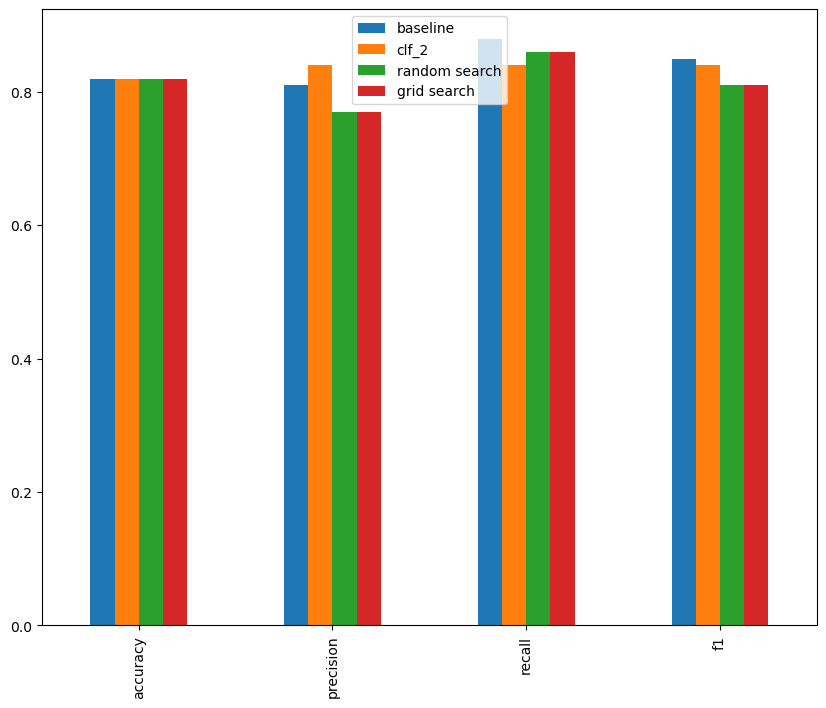

In [189]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "random search": rs_metrics,
                              "grid search": gs_metrics})

compare_metrics.plot.bar(figsize = (10, 8));

## 6.  Save and load a trained model 

TWO ways to save and load machine learning models:

1. With Python's `Pickle` module
2. With the `joblib` module

** Pickle **

In [190]:
import pickle 

# Save an existing model to file 
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [191]:
# Load a saved model 
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [192]:
# Make some prediction 
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc : 81.97%
Precision : 0.77
Recall : 0.86
F1 score : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

** Joblib ** 

In [193]:
from joblib import dump, load

# Save model to file 
dump(gs_clf, filename="gs_random_forest_model_1.joblib")


['gs_random_forest_model_1.joblib']

In [194]:
# Import a saved joblib model 

loaded_job_model = load(filename= "gs_random_forest_model_1.joblib")

In [195]:
# Make and evaluate joblib prediction 

joblib_y_preds = loaded_job_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc : 81.97%
Precision : 0.77
Recall : 0.86
F1 score : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7.0 Putting it all together `

In [196]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data 

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [197]:
data.dtypes 

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [199]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do (all in one cell):
    
    1. Fill missing data 
    2. Convert data to numbers
    3. Build a model on the data 
    

In [205]:
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed 
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels 
data.dropna(subset = ["Price"], inplace = True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = [
    ("imputer",SimpleImputer(strategy="constant", fill_value="missing"), ),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps= [
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values , then convert to numbers )
prepocessor = ColumnTransformer(
                    transformers= [
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps= [("preprocessor", prepocessor),
                        ("model", RandomForestRegressor())])

# Split data 
x = data.drop("Price", axis = 1)
y = data["Price"]
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size= 0.2)

# Fit and score the model 
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [214]:
# use GridSearchCV with our regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None, 5],
    "model__max_features" : ["sqrt"],
    "model__min_samples_split" : [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [216]:
gs_model.score(x_test, y_test)

0.2848784564026805